# **Proyek Sistem Rekomendasi: Rekomendasi Film Tahun 1996 - 2018**

## **Import Library**

In [2]:
# Melakukan import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

print(tf.__version__)

2.19.0


**Insight:**

- Pandas: untuk manipulasi dan analisis data
- Numpy: untuk komputasi numerik
- Matplotlib: untuk visualisasi data
- Tensorflow: untuk membuat model deep learning
- Sklearn: untuk machine learning

## **Loading Dataset**

Melakukan loading dataset menggunakan pandas

In [3]:
links_df = pd.read_csv("data/links.csv")
movies_df = pd.read_csv("data/movies.csv")
ratings_df = pd.read_csv("data/ratings.csv")
tags_df = pd.read_csv("data/tags.csv")

In [5]:
links_df.head(5)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [6]:
movies_df.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
ratings_df.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
tags_df.head(5)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


**Insight:**

- Pada proyek ini terdapat empat dataset yaitu links, movies, ratings dan tags
- Dataset ratings berisi baris data yang mewakili satu peringkat, satu movie oleh satu pengguna. Kolom pada dataset ini adalah userId, movieId, rating dan timestamp
- Dataset links berisi data movie dengan tautan ke sumber data film yaitu IMDB dan TMDB. Kolom pada dataset ini adalah movieId, imdbId dan tmdbId
- Dataset movies berisi informasi dari film yaitu judul dan genre. Kolom pada dataset ini adalah movieId, title dan genres
- Dataset tags berisi informasi tag yang diberikan oleh satu user pada satu film. Kolom pada dataset ini adalah userId, movieId, tag dan timestamp


## **Exploratory Data Analysis (EDA)**

### **Melihat Informasi Dataset**

In [9]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


**Insight:**

Berdasarkan output di atas, dataset movies memiliki 7742 entri. Terdapat tiga variabel pada dataset ini yaitu movieId, title atau judul film dan genres.


In [10]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


**Insight:**

Berdasarkan output di atas, dataset ratings memiliki 100835 entri. Terdapat empat variabel pada dataset ini yaitu userId, movieId, rating dan timestamp.

In [11]:
links_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


**Insight:**

Berdasarkan output di atas, dataset links memiliki 9741 entri. Terdapat tiga variabel pada dataset ini yaitu movieId, imdbId dan tmdbId.

In [12]:
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


**Insight:**

Berdasarkan output di atasm dataset tags memiliki 3682 entri. Terdapat empat variabel pada dataset ini yaitu userId, movieId, tag dan timestamp.

In [13]:
print('Jumlah userId: ', len(ratings_df['userId'].unique()))
print('Jumlah data film: ', len(movies_df['movieId']))
print('Jumlah data rating: ', len(ratings_df['rating']))

Jumlah userId:  610
Jumlah data film:  9742
Jumlah data rating:  100836


**Insight:**

Terdapat 610 user yang memberikan rating pada 9742 film. Kemudian untuk akumulasi data rating yang diberikan user totalnya adalah 100836.

### **Mengecek Missing Value**

In [14]:
links_df.isna().sum()

movieId    0
imdbId     0
tmdbId     8
dtype: int64

In [15]:
ratings_df.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [16]:
movies_df.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [17]:
tags_df.isna().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

**Insight:**

Dari keempat dataset di atas, setelah mengecek menggunakan isna() tidak ditemukan adanya missing value/Nan.

### **Melihat Deskripsi Statistik pada Dataset Rating**

In [18]:
ratings_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


**Insight:**

Dari output di atas, ditemukan bahwa nilai minimum user memberikan rating adalah 0.5 dan maksimum ratingnya adalah 5. Ini artinya, skala rating berkisar antara 0.5 hingga 5. Kemudian untuk rata-rata user memberikan rating 3.5.

### **Mengecek Nilai Duplikat pada Dataset**

In [19]:
print("Jumlah data duplikat pada links.csv: ", links_df.duplicated().sum())
print("Jumlah data duplikat pada movies.csv: ", movies_df.duplicated().sum())
print("Jumlah data duplikat pada ratings.csv: ", ratings_df.duplicated().sum())
print("Jumlah data duplikat pada tags.csv: ", tags_df.duplicated().sum())

Jumlah data duplikat pada links.csv:  0
Jumlah data duplikat pada movies.csv:  0
Jumlah data duplikat pada ratings.csv:  0
Jumlah data duplikat pada tags.csv:  0


**Insight:**

Dari keempat dataset di atas, setelah melakukan pengecekan dengan fungsi duplicated() tidak ditemukan adanya data yang sama/duplikat.

## **Data Preprocessing**

Pada tahapan ini akan menggabungkan beberapa dataset untuk menjadi dataset utama yang digunakan untuk modeling

In [20]:
# Menggabungkan dataset movies dengan ratings
main_movies_df = pd.merge(movies_df, ratings_df[['movieId', 'rating', 'userId']], on='movieId', how='left')

main_movies_df

,movieId,title,genres,rating,userId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,1.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,5.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5,7.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.5,15.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5,17.0
...,...,...,...,...,...
100849,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.0,184.0
100850,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.5,184.0
100851,193585,Flint (2017),Drama,3.5,184.0
100852,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.5,184.0


In [21]:
main_movies_df.isna().sum()

movieId     0
title       0
genres      0
rating     18
userId     18
dtype: int64

In [22]:
print("Jumlah data duplikasi: ", main_movies_df.duplicated().sum())

Jumlah data duplikasi:  0


**Insight:**

- Dari tahapan ini dihasilkan dataframe dari hasil gabungan dataset movies dan ratings. main_movies_df akan digunakan untuk membuat sistem rekomendasi film.
- Setelah dilakukan merge movies dan ratings, kemudian melakukan pengecekan missing value dengan isna(). Ditemukan untuk variabel rating dan userId terdapat missing value dengan jumlah masing-masing adalah 18 data. Masalah ini akan ditangani pada tahapan Data Preparation.
- Setelah merging tidak ditemukan data duplikasi


## **Data Preparation**

### **Mengatasi Missing Value**

In [23]:
# Memberishkan missing value dengan fungsi dropna()
main_movies_clean_df = main_movies_df.dropna()
main_movies_clean_df

,movieId,title,genres,rating,userId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,1.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,5.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5,7.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.5,15.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5,17.0
...,...,...,...,...,...
100849,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.0,184.0
100850,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.5,184.0
100851,193585,Flint (2017),Drama,3.5,184.0
100852,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.5,184.0


In [24]:
# Mengecek kembali missing value pada variabel main_movies_clean_df
main_movies_clean_df.isnull().sum()

movieId    0
title      0
genres     0
rating     0
userId     0
dtype: int64

**Insight:**
Langkah pertama pada tahapan Data Preparation adalah memersihkan missing value pada main_movies_df menggunakan fungsi dropna(). Kemudian dilakukan pengecekan kembali untuk memastikan apakah masalah missing value sudah ditangani. Terlihat pada output di atas sudah tidak ada missing value dan siap untuk lanjut ke proses selanjutnya.


### **Konversi Data Series menjadi List**

In [25]:
# Mengkonversi data series (movieId, title dan genres) menjadi dalam bentuk list
movie_id = main_movies_clean_df['movieId'].tolist()
movie_title = main_movies_clean_df['title'].tolist()
movie_genre = main_movies_clean_df['genres'].tolist()

print(len(movie_id))
print(len(movie_title))
print(len(movie_genre))

100836
100836
100836


In [26]:
# Membuat dictionary untuk data (movieId, title dan genres)
movie_new = pd.DataFrame({
    'id': movie_id,
    'title': movie_title,
    'genres': movie_genre,
}).drop_duplicates()

movie_new

,id,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
215,2,Jumanji (1995),Adventure|Children|Fantasy
325,3,Grumpier Old Men (1995),Comedy|Romance
377,4,Waiting to Exhale (1995),Comedy|Drama|Romance
384,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
100833,193585,Flint (2017),Drama
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


**Insight:**

Mengambil tiga variabel pada main_movies_clean_df yaitu movieId, title dan genre. Kemudian dari ketiga variabel ini diubah menjadi list. Setelah itu, membuat dictionary dengan pasangan key:value sesuai dengan variabel yang diambil. Kemudian dibuat dataframe yaitu movie_new dari dictionary yang sudah dibuat.

### **Melakukan Formatting pada Variabel Genres**

In [27]:
movies_formatted_df = movie_new.iloc[:]
movies_formatted_df['genres'] = movies_formatted_df['genres'].str.replace('-', '', regex=False)
movies_formatted_df

,id,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
215,2,Jumanji (1995),Adventure|Children|Fantasy
325,3,Grumpier Old Men (1995),Comedy|Romance
377,4,Waiting to Exhale (1995),Comedy|Drama|Romance
384,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
100833,193585,Flint (2017),Drama
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


**Insight:**

Terdapat nilai pada variabel genres yang dipisahkan dengan tanda "-". Untuk memudahkan proses vektorisasi nantinya, maka perlu mengghapus tanda "-" menjadi tanpa spasi.


### **Menghapus Data dengan Genre yang Tidak Jelas**

In [28]:
fix_movies_df = movies_formatted_df.iloc[:]

fix_movies_df['genres'].unique()

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance',
       'Comedy|Drama|Romance', 'Comedy', 'Action|Crime|Thriller',
       'Adventure|Children', 'Action', 'Action|Adventure|Thriller',
       'Comedy|Horror', 'Adventure|Animation|Children', 'Drama',
       'Action|Adventure|Romance', 'Crime|Drama', 'Drama|Romance',
       'Action|Comedy|Crime|Drama|Thriller', 'Comedy|Crime|Thriller',
       'Crime|Drama|Horror|Mystery|Thriller', 'Drama|SciFi',
       'Children|Drama', 'Adventure|Drama|Fantasy|Mystery|SciFi',
       'Mystery|SciFi|Thriller', 'Children|Comedy', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure|Fantasy',
       'Comedy|Drama|Thriller', 'Mystery|Thriller',
       'Animation|Children|Drama|Musical|Romance',
       'Crime|Mystery|Thriller', 'Adventure|Drama', 'Drama|Thriller',
       'Comedy|Crime', 'Action|SciFi|Thriller',
       'Action|Comedy|Horror|Thriller', 'Comedy|Drama', 'Documentary',
       'Action

In [29]:
fix_movies_df[fix_movies_df['genres'] == '(no genres listed)']

,id,title,genres
97487,114335,La cravate (1957),(no genres listed)
98182,122888,Ben-hur (2016),(no genres listed)
98216,122896,Pirates of the Caribbean: Dead Men Tell No Tal...,(no genres listed)
98608,129250,Superfast! (2015),(no genres listed)
98718,132084,Let It Be Me (1995),(no genres listed)
98932,134861,Trevor Noah: African American (2013),(no genres listed)
99331,141131,Guardians (2016),(no genres listed)
99357,141866,Green Room (2015),(no genres listed)
99391,142456,The Brand New Testament (2015),(no genres listed)
99459,143410,Hyena Road,(no genres listed)


In [30]:
fix_movies_df = fix_movies_df.replace('(no genres listed)', np.nan)
fix_movies_df = fix_movies_df.dropna()

fix_movies_df

,id,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
215,2,Jumanji (1995),Adventure|Children|Fantasy
325,3,Grumpier Old Men (1995),Comedy|Romance
377,4,Waiting to Exhale (1995),Comedy|Drama|Romance
384,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
100833,193585,Flint (2017),Drama
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


**Insight:**

Terdapat film dengan genre yang tidak jelas yaitu "(no genres listed)". Untuk menjaga kualitas data, maka perlu dilakukan penghapusan pada data tersebut.

### **Melakukan Encoding Fitur userId dan movieId ke dalam Indeks Integer**

In [31]:
# Membuat dataframe baru
new_rating_df = ratings_df.drop(columns=['timestamp'])

# Mengubah userId menjadi list tanpa nilai yang sama
user_ids = new_rating_df['userId'].unique().tolist()
print('list userId: ', user_ids[:10])

# Melakukan encoding userId
user_to_user_encoding = {
    x: i for i, x in enumerate(user_ids)
}
print('encoded userId [1]: ', user_to_user_encoding[1])

# Melakukan proses encoding angka ke userId
user_encoded_to_user = {
    i: x for i, x in enumerate(user_ids)
}
print('encoding angka ke userId [0]: ', user_encoded_to_user[0])

list userId:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
encoded userId [1]:  0
encoding angka ke userId [0]:  1


In [32]:
# Mengubah movieId menjadi list tanpa nilai yang sama
movie_ids = new_rating_df['movieId'].unique().tolist()
print('list movieId: ', movie_ids[:10])

# Melakukan proses encoding movieId
movie_to_movie_encoded = {
    x: i for i, x in enumerate(movie_ids)
}
print('encoded movieId [1]: ', movie_to_movie_encoded[1])

# Melakukan proses encoding angka ke movieId
movie_encoded_to_movie = {
    i: x for i, x in enumerate(movie_ids)
}
print('encoding angka ke movieId [0]: ', movie_encoded_to_movie[0])

list movieId:  [1, 3, 6, 47, 50, 70, 101, 110, 151, 157]
encoded movieId [1]:  0
encoding angka ke movieId [0]:  1


In [33]:
# Mapping userId ke dataframe user
new_rating_df['user'] = new_rating_df['userId'].map(user_to_user_encoding)

# Mapping movieId ke dataframe movie
new_rating_df['movie'] = new_rating_df['movieId'].map(movie_to_movie_encoded)

**Insight:**

Tahapan ini digunakan untuk mengubah ID asli (userId dan movieId) yang mungkin tidak berurutan menjadi ID baru yang berurutan mulai dari 0, 1, 2, dan seterusnya.

### **Mempersiapkan Data untuk Modeling Collaborative Filtering**

In [34]:
# Mendaoatkan jumlah user
num_users = len(user_to_user_encoding)

# Mendapatkan jumlah film
num_movie = len(movie_encoded_to_movie)

# Mendapatkan minimum dan maksimum rating
min_rating = min(new_rating_df['rating'])
max_rating = max(new_rating_df['rating'])

print("Number of User: {}\nNumber of Movie: {}\nMin Rating: {}\nMax Rating: {}".format(num_users, num_movie, min_rating, max_rating))

Number of User: 610
Number of Movie: 9724
Min Rating: 0.5
Max Rating: 5.0


**Insight:**

Mempersiapkan data yaitu jumlah user, jumlah film, nilai minimum rating dan nilai maksimu rating. Data ini digunakan untuk modeling dengan pendekatan Collaborative Filtering.


### **Membagi Data untuk Training dan Validasi**

In [35]:
# Mengacak data
new_rating_df = new_rating_df.sample(frac=1, random_state=42)
new_rating_df

,userId,movieId,rating,user,movie
67037,432,77866,4.5,431,4730
42175,288,474,3.0,287,474
93850,599,4351,3.0,598,2631
6187,42,2987,4.0,41,194
12229,75,1610,4.0,74,727
...,...,...,...,...,...
6265,42,4005,4.0,41,1873
54886,364,141,4.0,363,524
76820,480,6867,4.0,479,2240
860,6,981,3.0,5,712


**Insight:**

Sebelum melakukan spliting dataset, data diacak terelbih dahulu supaya distribusinya menjadi random.

In [36]:
# Membuat variabel x untuk mencocokkan data user dan movie menjadi satu value
x = new_rating_df[['user', 'movie']].values

# Membuat variabel y untuk membuat rating dari hasil
y = new_rating_df['rating'].apply(lambda z: (z - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * new_rating_df.shape[0])

x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

print(x, y)

[[ 431 4730]
 [ 287  474]
 [ 598 2631]
 ...
 [ 479 2240]
 [   5  712]
 [ 102 2046]] [0.88888889 0.55555556 0.55555556 ... 0.77777778 0.55555556 1.        ]


**Insight:**

Melakukan spliting dataset menjadi data train dan data validasi dengan perbandingan 80:20. Sebelum melakukan spliting dataset, dilakukan scaling nilai variabel rating dalam rentang 0 sampai 1 untuk mempermudah proses training. Data train dan validasi ini digunakan untuk modeling dengan pendekatan Collaborative Filtering.

## **Modeling**

### **Model Development dengan Content Based Filtering**

Mengembangkan sistem rekomendasi film dengan pendekatan content based filtering berdasarkan genre film

#### **Mempersiapkan data untuk modeling CBF**

In [37]:
data_cbf = fix_movies_df.iloc[:]
data_cbf.sample(5)

,id,title,genres
21593,984,"Pompatus of Love, The (1996)",Comedy|Drama
94896,96945,Love Lasts Three Years (L'amour dure trois ans...,Comedy|Drama|Romance
48171,2795,National Lampoon's Vacation (1983),Comedy
74141,7167,Japanese Story (2003),Drama
56235,3674,For the Love of Benji (1977),Adventure|Children|Comedy|Drama


#### **Menemukan Representasi Fitur Penting**

In [38]:
# Inisialisasi TfidVectorizer
tfid = TfidfVectorizer()

# Melakukan perhitungan idf pada data genres
tfid.fit(data_cbf['genres'])

# Mapping array dari fitur index integer ke fitur nama
tfid.get_feature_names_out()

array(['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'filmnoir', 'horror', 'imax',
       'musical', 'mystery', 'romance', 'scifi', 'thriller', 'war',
       'western'], dtype=object)

**Insight:**

Dari hasil vektorisasi menggunakan TfidfVectorizer didapatkan fitur yaitu
['action', 'adventure', 'animation', 'children', 'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'filmnoir', 'horror', 'imax', 'musical', 'mystery', 'romance', 'scifi', 'thriller', 'war', 'western']


In [39]:
# Melakukukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tfid.transform(data_cbf['genres'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(9690, 19)

**Insight:**

Hasil matrix memiliki ukuran (9690, 19). Nilai 9690 merupakan ukuran data dan 19 merupakan matrix genre film.

In [40]:
# Mengubah vektor tfidf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.        , 0.41677501, 0.51640289, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.5122897 , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.57821416, 0.        , 0.81588503, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [41]:
# Membuat dataframe untuk melihat tfidf matrix
# Kolom diisi dengan genre film
# Baris diisi dengan judul film

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tfid.get_feature_names_out(),
    index=data_cbf['title'],
)

,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,filmnoir,horror,imax,musical,mystery,romance,scifi,thriller,war,western
title,,,,,,,,,,,,,,,,,,,
Toy Story (1995),0.000000,0.416775,0.516403,0.504783,0.267318,0.0,0.0,0.000000,0.483075,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Jumanji (1995),0.000000,0.512290,0.000000,0.620467,0.000000,0.0,0.0,0.000000,0.593784,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Grumpier Old Men (1995),0.000000,0.000000,0.000000,0.000000,0.570321,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.821422,0.0,0.0,0.0,0.0
Waiting to Exhale (1995),0.000000,0.000000,0.000000,0.000000,0.504506,0.0,0.0,0.466351,0.000000,0.0,0.0,0.0,0.0,0.0,0.726630,0.0,0.0,0.0,0.0
Father of the Bride Part II (1995),0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Black Butler: Book of the Atlantic (2017),0.435735,0.000000,0.614840,0.000000,0.318275,0.0,0.0,0.000000,0.575159,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
No Game No Life: Zero (2017),0.000000,0.000000,0.683099,0.000000,0.353609,0.0,0.0,0.000000,0.639012,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Flint (2017),0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


**Insight:**

Dari hasil moutput matriks tfid di atas menunjukkan film Toy Story (1995) memiliki genre adventure, animation, children, comedy dan fantasy. Hal ini terlihat dari nilai matriks 0.416775 pada genre adventure, 0.516403 pada genre animation, 0.504783 pada genre children, 0.267318 pada genre comedy dan 0.483075 pada genre fantasy.


#### **Cosine Similarity**

In [42]:
# Menghitung cosine similarity pada matrix tfidf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.81355337, 0.15245713, ..., 0.        , 0.42132539,
        0.26731811],
       [0.81355337, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.15245713, 0.        , 1.        , ..., 0.        , 0.        ,
        0.57032099],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.42132539, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.26731811, 0.        , 0.57032099, ..., 0.        , 0.        ,
        1.        ]])

**Insight:**

Pada tahap ini dilakukan perhitungan cosine similarity pada dataframe tfidf_matrix. Menggunakan fungsi consine_similarity dari library sklearn. Terlihat pada output di atas adalah matriks kesamaan dalam bentuk array.

In [43]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolo berupa nama film
cosine_sim_df = pd.DataFrame(cosine_sim, index=data_cbf['title'], columns=data_cbf['title'])
print("Shape: ", cosine_sim_df.shape)

# Melihat similarity matrix pada setiap film
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape:  (9690, 9690)


title,Mystery Date (1991),Supercop 2 (Project S) (Chao ji ji hua) (1993),Jules and Jim (Jules et Jim) (1961),Trekkies (1997),"Spy Who Came in from the Cold, The (1965)"
title,,,,,
Planet 51 (2009),0.271359,0.100988,0.000000,0.0,0.000000
Wizards of the Lost Kingdom II (1989),0.000000,0.307669,0.000000,0.0,0.000000
"Bay, The (2012)",0.000000,0.247853,0.000000,0.0,0.406597
Eden (2014),0.000000,0.000000,0.540128,0.0,0.564339
Life or Something Like It (2002),0.570321,0.212248,0.691295,0.0,0.000000
RKO 281 (1999),0.000000,0.000000,0.540128,0.0,0.564339
Wolf Children (Okami kodomo no ame to yuki) (2012),0.000000,0.000000,0.000000,0.0,0.000000
"Haunted World of El Superbeasto, The (2009)",0.297589,0.520830,0.000000,0.0,0.332201
In the Line of Fire (1993),0.000000,0.716125,0.000000,0.0,0.580124


**Insight:**

Shape (9690, 9690) merupakan ukuran matriks similarity dari data film. Dari output di atas, sebagai contoh film Taken (2008) memiliki indikasi kesamaan dengan film Cleanskin (2012) dengan nilai similarity adalah 0.857362 dan Knight's Tale, A (2001) nilainya 0.316767.

#### **Mendapatkan Rekomendasi Film**

In [44]:
def movie_recommendations(movie_title, similarity_data=cosine_sim_df, items=data_cbf[['title', 'genres']], k=5):
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:, movie_title].to_numpy().argpartition(range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k + 2): -1]]

    # Drop movie_title agar judul film yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(movie_title, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

**Insight:**

Fungsi ini bertujuan untuk memberikan rekomendasi film berdasarkan judul film yang diberikan, dengan memanfaatkan data kemiripan (similarity) yang sudah dihitung sebelumnya.

Secara ringkas, alur kerjanya adalah sebagai berikut:

1. Mencari Indeks Film Termirip: Baris pertama menggunakan .argpartition() untuk cara yang sangat cepat dalam menemukan posisi (indeks) dari k film yang paling mirip dengan movie_title tanpa perlu mengurutkan seluruh data.
2. Mengambil Judul Film: Berdasarkan posisi tersebut, baris kedua mengambil judul-judul film yang paling mirip dan mengurutkannya dari yang paling tinggi kemiripannya.
3. Menghapus Film Asli: Baris ketiga memakai .drop() untuk menghapus movie_title dari daftar rekomendasi, agar film tersebut tidak merekomendasikan dirinya sendiri.
4. Menampilkan Hasil Akhir: Terakhir, fungsi ini menggabungkan daftar judul film yang sudah bersih dengan data items (yang berisi judul dan genre), lalu mengembalikan k rekomendasi teratas dalam bentuk tabel (DataFrame) yang rapi.

In [45]:
# Mendapatkan rekomendasi film yang mirip dengan Toy Story (1995)
movie_recommendations('Toy Story (1995)')

,title,genres
0,Moana (2016),Adventure|Animation|Children|Comedy|Fantasy
1,"Tale of Despereaux, The (2008)",Adventure|Animation|Children|Comedy|Fantasy
2,Shrek the Third (2007),Adventure|Animation|Children|Comedy|Fantasy
3,"Wild, The (2006)",Adventure|Animation|Children|Comedy|Fantasy
4,"Adventures of Rocky and Bullwinkle, The (2000)",Adventure|Animation|Children|Comedy|Fantasy


**Insight:**

Melakukan percobaan untuk mencari rekomendasi film yang sama dengan film Toy Story (1995). Didapatkan hasil film yang mirip berdasarkan genrenya adalah Moana (2016), Tale of Despereaux, The (2008), Shrek the Third (2007), Wild, The (2006) dan Adventures of Rocky and Bullwinkle, The (2000)

### **Model Development dengan Collaborative Filtering**

#### **Training Model**

In [46]:
class RecommenderNet(keras.Model):

    # Inisialisasi fungsi
    def __init__(self, num_users, num_movie, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_movie = num_movie
        self.embedding_size = embedding_size

        # layer Embedding user
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )

        # layer embedding user bias
        self.user_bias = layers.Embedding(num_users, 1)

        # layer embeddings movie
        self.movie_embedding = layers.Embedding(
            num_movie,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )

        # layer embedding movie bias
        self.movie_bias = layers.Embedding(num_movie, 1)

    def call(self, inputs):
        # memanggil layer embedding 1
        user_vector = self.user_embedding(inputs[:, 0])
        # memanggil layer embedding 2
        user_bias = self.user_bias(inputs[:, 0])
        # memanggil layer embedding 3
        movie_vector = self.movie_embedding(inputs[:, 1])
        # memanggil layer embedding 4
        movie_bias = self.movie_bias(inputs[:, 1])

        dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)

        x = dot_user_movie + user_bias + movie_bias

        # Aktivasi sigmoid
        return tf.nn.sigmoid(x)

**Insight:**

Kode di atas membuat sebuah model neural network untuk sistem rekomendasi film dengan pendekatan Collaborative Filtering. Secara spesifik, ini adalah implementasi dari teknik Matrix Factorization menggunakan Keras.


In [47]:
# Inisialisasi model
model = RecommenderNet(num_users, num_movie, 30)

# Compile model
model.compile(
    loss = keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics = [keras.metrics.RootMeanSquaredError()],
)

I0000 00:00:1750201533.125268      91 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1750201533.125980      91 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


**Insight:**

Model ini menggunakan Binary Crossentropy untuk menghitung loss function, Adam sebagai optimizer dan root mean squared erro (RMSE) sebagai metrik evaluasi.

In [48]:
# Memulai training
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 50,
    validation_data = (x_val, y_val)
)

Epoch 1/50


I0000 00:00:1750201536.771432     124 service.cc:148] XLA service 0x7a7824006200 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750201536.771776     124 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1750201536.771797     124 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1750201537.004112     124 cuda_dnn.cc:529] Loaded cuDNN version 90300


   74/10084 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.6923 - root_mean_squared_error: 0.2930

I0000 00:00:1750201537.528818     124 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


10084/10084 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - loss: 0.6459 - root_mean_squared_error: 0.2419 - val_loss: 0.6112 - val_root_mean_squared_error: 0.2049
Epoch 2/50
10084/10084 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - loss: 0.6038 - root_mean_squared_error: 0.1984 - val_loss: 0.6064 - val_root_mean_squared_error: 0.1997
Epoch 3/50
10084/10084 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - loss: 0.5977 - root_mean_squared_error: 0.1910 - val_loss: 0.6057 - val_root_mean_squared_error: 0.1987
Epoch 4/50
10084/10084 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - loss: 0.5956 - root_mean_squared_error: 0.1883 - val_loss: 0.6052 - val_root_mean_squared_error: 0.1981
Epoch 5/50
10084/10084 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - loss: 0.5936 - root_mean_squared_error: 0.1859 - val_loss: 0.6046 - val_root_mean_squared_error: 0.1973
Epoch 6/50
10084/10084 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - loss: 0.5914 - root_mean_squared_error: 0.1839 - val_loss: 0.6048 - val_root_mean_squared_error: 0.1974
Epoch 7/50
10084/10084 ━━━━━━━━━━

**Insight:**

Kode ini adalah perintah untuk memulai proses training (pelatihan) model dengan konfigurasi sebagai berikut:
- x = x_train, y = y_train: Model akan belajar dari data training (x_train) untuk bisa menebak y_train dengan benar.
- batch_size = 8: Data akan diproses dalam kelompok-kelompok kecil berisi 8 sampel untuk efisiensi.
- epochs = 50: Seluruh proses belajar ini akan diulang sebanyak 50 kali.
- validation_data = (x_val, y_val): Setelah setiap putaran (epoch), performa model akan dievaluasi menggunakan data validasi untuk memantau apakah terjadi overfitting.

Hasil dari proses training ini (seperti riwayat loss dan RMSE) akan disimpan dalam variabel history.

#### **Visualisasi Metrik**

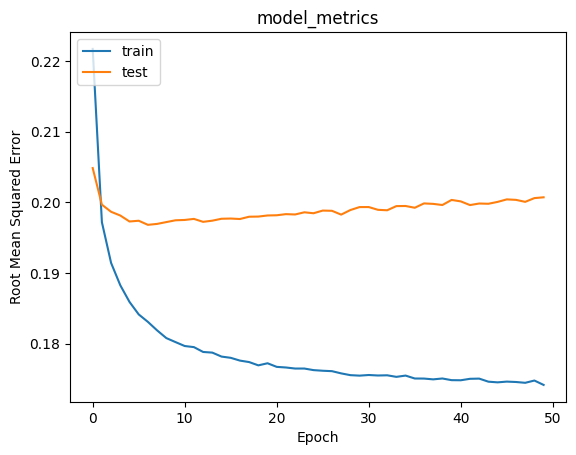

In [52]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Insight:**

Dari hasil grafik di atas, setelah proses training model didapatkan nilai error akhir sebesar 0.1732 dan error pada data validasi sebesar 0.2007. 


#### **Mendapatkan Rekomendasi Film**

In [55]:
df_movies = fix_movies_df.iloc[:]
movie = pd.read_csv('data/ratings.csv')

# Mengambil sampel user
user_id = movie['userId'].sample(1).iloc[0]
movie_watched_by_user = movie[movie['userId'] == user_id]

movie_not_watched = df_movies[~df_movies['id'].isin(movie_watched_by_user['movieId'].values)]['id']
movie_not_watched = list(
    set(movie_not_watched)
    .intersection(
        set(movie_to_movie_encoded.keys())
    )
)

movie_not_watched = [[movie_to_movie_encoded.get(x)] for x in movie_not_watched]
user_encoder = user_to_user_encoding .get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_watched), movie_not_watched)
)

**Insight:**

Kode ini bertujuan untuk mempersiapkan data input yang akan diberikan ke model rekomendasi untuk mendapatkan prediksi bagi satu pengguna spesifik.  Hasil akhirnya adalah data yang siap dimasukkan ke model.predict() untuk memperkirakan rating semua film yang belum ditonton oleh pengguna tersebut.

In [56]:
ratings = model.predict(user_movie_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded_to_movie.get(movie_not_watched[x][0]) for x in top_ratings_indices
]

print("Showing recommendations for users: {}".format(user_id))
print("====" * 8)
print("Movie with high ratings from user")
print('----' * 14)

top_movie_user = (
    movie_watched_by_user.sort_values(
        by='rating',
        ascending=False
    )
    .head(5)['movieId'].values
)

movie_df_rows = df_movies[df_movies['id'].isin(top_movie_user)]
for row in movie_df_rows.itertuples():
    print(row.title, ':', row.genres)

print("\n")
print('----' * 15)
print('Top 10 movie recommendation')
print('----' * 15)

recommended_movie = df_movies[df_movies['id'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.title, ':', row.genres)


294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Showing recommendations for users: 425
Movie with high ratings from user
--------------------------------------------------------
Léon: The Professional (a.k.a. The Professional) (Léon) (1994) : Action|Crime|Drama|Thriller
Shawshank Redemption, The (1994) : Crime|Drama
Forrest Gump (1994) : Comedy|Drama|Romance|War
Trainspotting (1996) : Comedy|Crime|Drama
Varsity Blues (1999) : Comedy|Drama


------------------------------------------------------------
Top 10 movie recommendation
------------------------------------------------------------
Heidi Fleiss: Hollywood Madam (1995) : Documentary
Paths of Glory (1957) : Drama|War
Jonah Who Will Be 25 in the Year 2000 (Jonas qui aura 25 ans en l'an 2000) (1976) : Comedy
Stunt Man, The (1980) : Action|Adventure|Comedy|Drama|Romance|Thriller
Belle époque (1992) : Comedy|Romance
Trial, The (Procès, Le) (1962) : Drama
Adam's Rib (1949) : Comedy|Romance
Bad Boy Bubby (1993) : Drama
Enter the Void (2009) : D

**Insight:**

- Kode ini menampilkan dua bagian informasi:
  - Film yang Sudah Disukai Pengguna: Menampilkan 5 film dengan rating tertinggi yang pernah diberikan oleh pengguna sebagai referensi seleranya.
  - Top 10 Rekomendasi: Menampilkan judul dan genre dari 10 film baru yang paling direkomendasikan oleh model untuk pengguna tersebut.
- Dari hasil rekomendasi di atas untuk user dengan id 425, diperoleh rekomendasi beberapa film yang sesuai dengan rating user yaitu dengan genre Action, Drama, Comedy, War, Thriller dan Romance